In [89]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [97]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, distinct

In [13]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [15]:
Base = automap_base()
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)
# reflect the tables
station = Base.classes.station
measurement = Base.classes.measurement

In [29]:
# We can view all of the classes that automap found
Base.metadata.sorted_tables

[Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None),
 Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)]

In [35]:
# Save references to each table
measurement_table = Base.metadata.sorted_tables[0]
station_table = Base.metadata.sorted_tables[1]

In [38]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

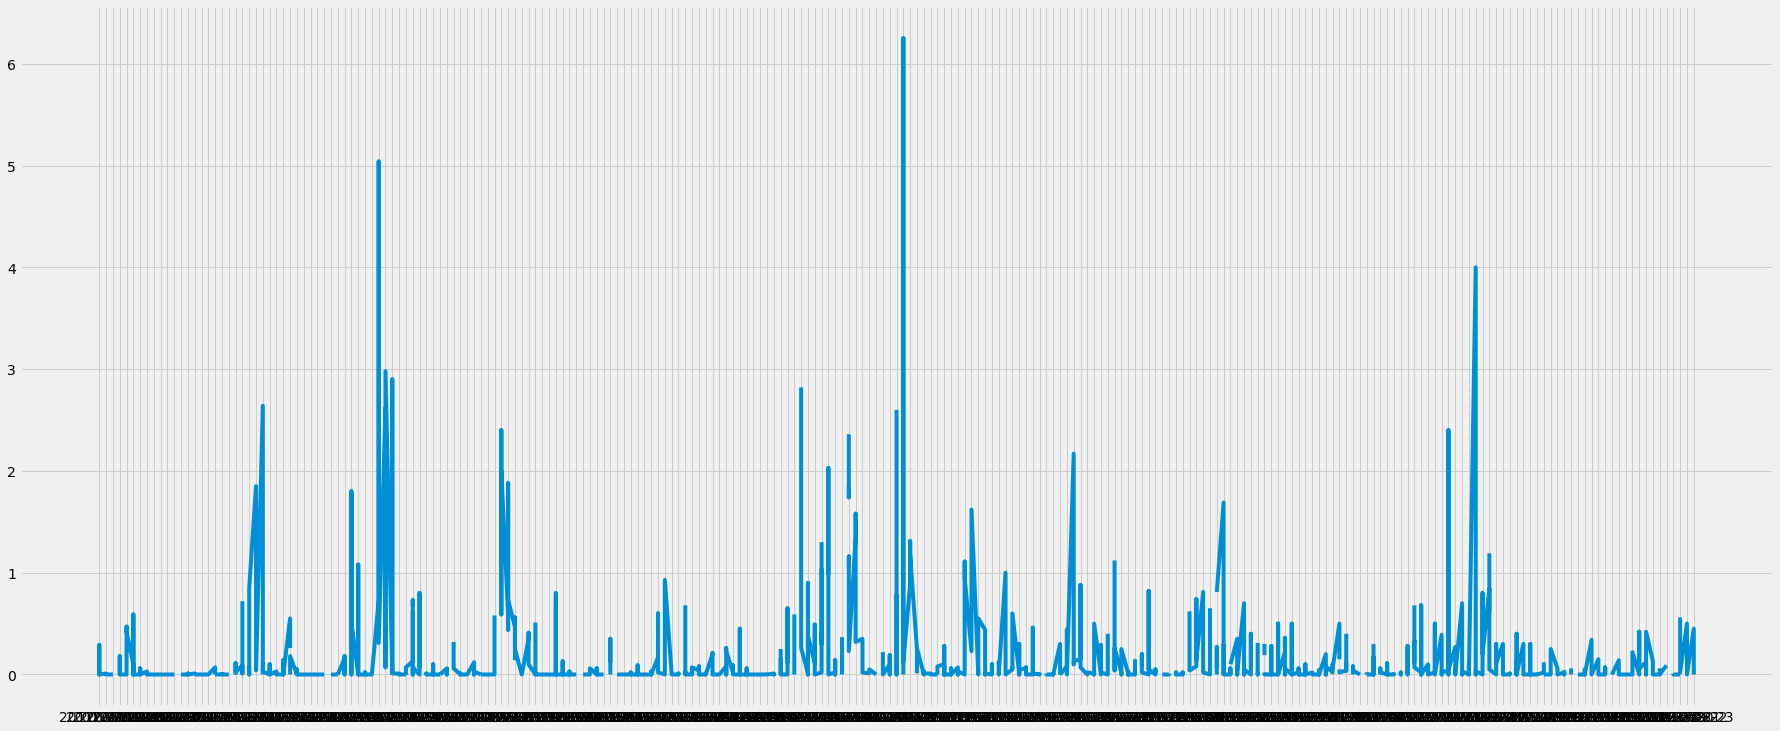

In [92]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_year = session.query(measurement).order_by(measurement.date)[-1].date[:4]
# Perform a query to retrieve the data and precipitation scores
date_list = []
prcp_list = []
for g in session.query(measurement).order_by(measurement.date.desc()):
    if(g.date[:4] == last_year):
        date_list.append(g.date)
        prcp_list.append(g.prcp)
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_last_year = pd.DataFrame()
prcp_last_year["date"] = date_list
prcp_last_year["prcp"] = prcp_list
# Sort the dataframe by date
prcp_last_year = prcp_last_year.sort_values(by="date")
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(28,12))
plt.plot(prcp_last_year["date"],prcp_last_year["prcp"])
plt.show()

In [95]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_last_year["prcp"].describe()

count    1267.000000
mean        0.165927
std         0.453913
min         0.000000
25%         0.000000
50%         0.000000
75%         0.105000
max         6.250000
Name: prcp, dtype: float64

In [100]:
# Design a query to show how many stations are available in this dataset?
print("Number of stations in the dataset: ",session.query(func.count(distinct(station.id))).scalar())

Number of stations in the dataset:  9


In [170]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(func.count(measurement.station),measurement.station).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [126]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
print('Highest Temperature recorded: ',session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()[0][0])
print('Lowest Temperature recorded: ',session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()[0][0])
print('Average Temperature recorded: ',round(session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()[0][0],1))

Highest Temperature recorded:  85.0
Lowest Temperature recorded:  54.0
Average Temperature recorded:  71.7


In [153]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_last_year = []
for date, temp in session.query(measurement.date, measurement.tobs).filter(measurement.station == 'USC00519281').order_by(measurement.date.desc()).all():
    if date[:4] == last_year:
        temp_last_year.append(temp)
    else:
        break

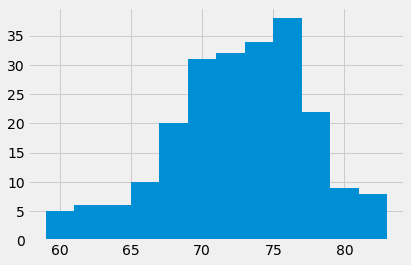

In [161]:
plt.hist(temp_last_year,bins=12)
plt.show()

In [197]:
from datetime import datetime
date_str = '2015-01-01'
date_str_2 = '2016-01-01'


In [198]:
temp_list = []
for a,b in session.query(measurement.date, measurement.tobs).group_by(measurement.date).all():
    if (datetime.strptime(date_str,"%Y-%m-%d") <= datetime.strptime(a,"%Y-%m-%d") and datetime.strptime(date_str_2,"%Y-%m-%d") >= datetime.strptime(a,"%Y-%m-%d")):
        temp_list.append(b)

2015-01-01 69.0
2015-01-02 64.0
2015-01-03 63.0
2015-01-04 58.0
2015-01-05 58.0
2015-01-06 66.0
2015-01-07 66.0
2015-01-08 59.0
2015-01-09 63.0
2015-01-10 77.0
2015-01-11 61.0
2015-01-12 62.0
2015-01-13 70.0
2015-01-14 66.0
2015-01-15 68.0
2015-01-16 68.0
2015-01-17 66.0
2015-01-18 67.0
2015-01-19 66.0
2015-01-20 67.0
2015-01-21 64.0
2015-01-22 65.0
2015-01-23 72.0
2015-01-24 66.0
2015-01-25 64.0
2015-01-26 67.0
2015-01-27 59.0
2015-01-28 68.0
2015-01-29 74.0
2015-01-30 60.0
2015-01-31 63.0
2015-02-01 72.0
2015-02-02 68.0
2015-02-03 72.0
2015-02-04 72.0
2015-02-05 63.0
2015-02-06 59.0
2015-02-07 60.0
2015-02-08 60.0
2015-02-09 75.0
2015-02-10 67.0
2015-02-11 62.0
2015-02-12 63.0
2015-02-13 67.0
2015-02-14 73.0
2015-02-15 63.0
2015-02-16 68.0
2015-02-17 63.0
2015-02-18 64.0
2015-02-19 68.0
2015-02-20 69.0
2015-02-21 68.0
2015-02-22 69.0
2015-02-23 71.0
2015-02-24 71.0
2015-02-25 69.0
2015-02-26 68.0
2015-02-27 67.0
2015-02-28 70.0
2015-03-01 68.0
2015-03-02 76.0
2015-03-03 70.0
2015-03-

In [195]:
def Average(lst): 
    return sum(lst) / len(lst) 

NameError: name 'avg' is not defined

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
